# Load necessary libraries 

In [1]:
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA 
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


# Load the data

In [2]:
df = pd.read_csv("sales_train.csv")

In [3]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


# ------------Forecasting sales for a single shop-------------

In [4]:
shop = df[df['shop_id'] == 59]
shop.drop('item_id',inplace=True,axis=1)
shop.drop('shop_id',inplace=True,axis=1)
shop['sales'] = shop['item_cnt_day'] * shop['item_price']
shop.drop('item_cnt_day',inplace=True,axis=1)
shop.drop('item_price',inplace=True,axis=1)
sales = shop.groupby('date_block_num').sum()
sales['sales'] = sales['sales'].astype('int64')
sales.reset_index(inplace=True)
y = sales['sales']



<BarContainer object of 34 artists>

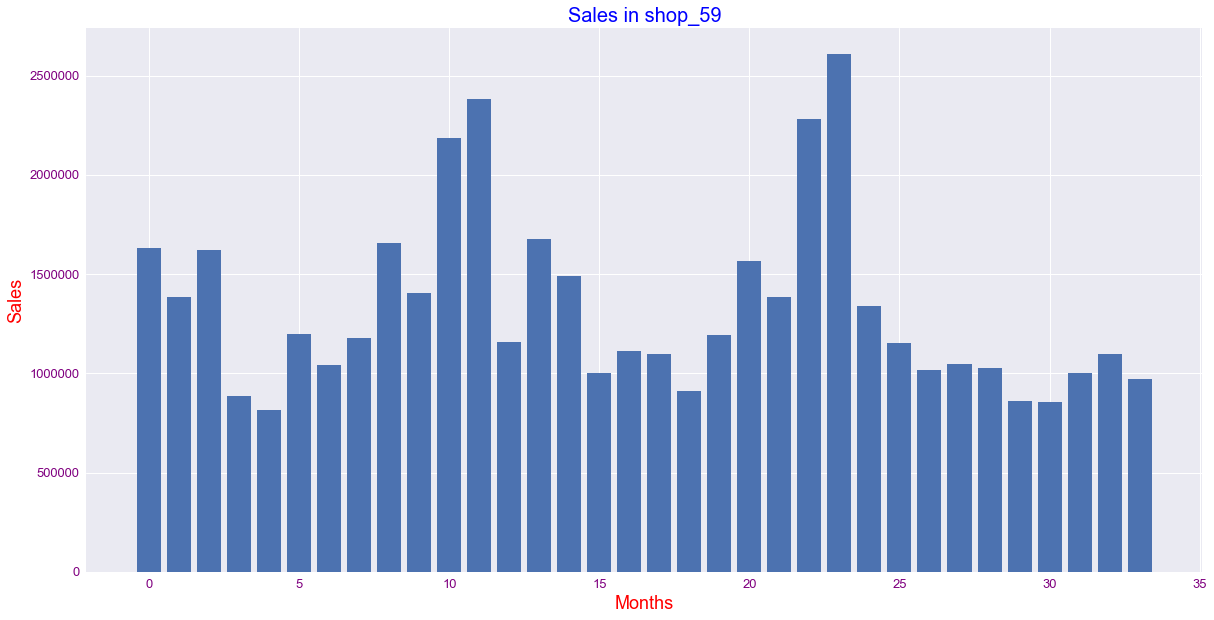

In [5]:
fig = plt.figure(figsize=(20, 10))

plt.style.use('seaborn')

plt.ticklabel_format(style='plain')
plt.xlabel("Months", fontsize=18, color='red')
plt.ylabel("Sales", fontsize=18, color='red')
plt.tick_params(axis='both', labelcolor='purple', labelsize=13)
plt.title("Sales in shop_59", fontsize=20, color='blue')

plt.bar(sales['date_block_num'], y)

# Create ARIMA model

## Predicting sales for last 10 months in shop_59

In [6]:
X = sales['sales'].tolist()
size = int(len(X) * 0.73)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(1, 0, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f"predicted: {yhat}, expected: {obs}")

mae = sqrt(mean_absolute_error(test, predictions))
print(f"Test MAE: {mae}")


F:\Users\Klaudiuszek\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted: [2062557.47681666], expected: 1339901
predicted: [1406611.59841522], expected: 1151476
predicted: [1325833.01472273], expected: 1014051
predicted: [1256776.01078061], expected: 1044683
predicted: [1255954.40740749], expected: 1025225
predicted: [1235163.58607433], expected: 862364
predicted: [1143933.40596654], expected: 854894
predicted: [1120172.80282261], expected: 998974
predicted: [1179487.34806833], expected: 1096853
predicted: [1221821.49659803], expected: 972716
Test MAE: 533.5891816437584


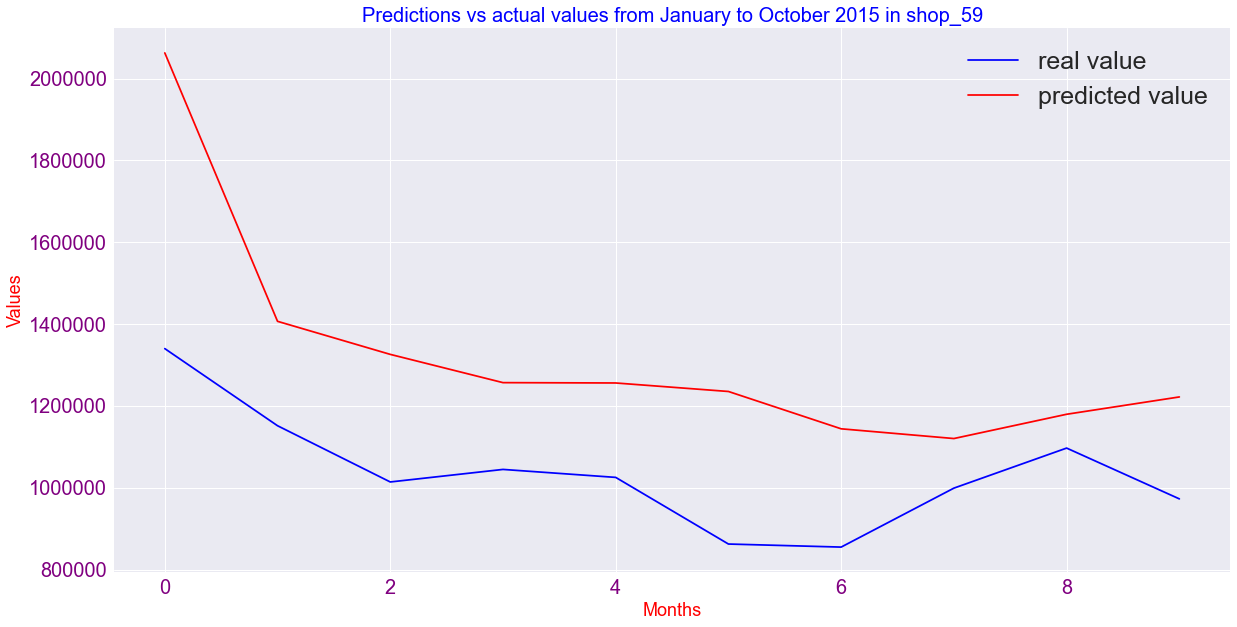

In [7]:
fig = plt.figure(figsize=(20, 10))

plt.style.use('seaborn')

plt.ticklabel_format(style='plain')
plt.xlabel("Months", fontsize=18, color='red')
plt.ylabel("Values", fontsize=18, color='red')
plt.tick_params(axis='both', labelcolor='purple', labelsize=20)
plt.title("Predictions vs actual values from January to October 2015 in shop_59", fontsize=20, color='blue')
plt.plot(test, color='blue', label='real value')
plt.plot(predictions, color='red', label='predicted value')
plt.legend(prop={'size': 25})



# Last 10 months
## MAE: 533

## Predicting sales for one last month in shop_59

In [8]:
X = sales['sales'].tolist()
size = int(len(X) * 0.99)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5, 2, 2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f"predicted: {yhat}, expected: {obs}")

mae = sqrt(mean_absolute_error(test, predictions))
print(f"Test MAE: {mae}")


F:\Users\Klaudiuszek\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted: [975034.3124052], expected: 972716
Test MAE: 48.14885673827576


F:\Users\Klaudiuszek\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


# Values for last month:
## Real: 972716
## Predicted: 975034
### MAE: 48